In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data/GL-06-04

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-04


### Load Raw Data

In [35]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
#Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# Instantiate class
peaks = Peaks(ir_data)

# List all the wavelengths observed
#print(ir_data.columns)
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1703 cm-1', 'Peak at 1746 cm-1']


,Relative Time,Peak Property,Method
0,6.683333,0.199860,prominence
1,12.683333,0.222701,prominence
2,19.183333,0.209898,prominence
3,25.683333,0.201083,prominence
4,32.183333,0.177009,prominence
5,38.683333,0.154695,prominence
6,45.183333,0.145431,prominence
7,51.683333,0.120307,prominence
8,58.433333,0.099693,prominence
9,64.683333,0.072837,prominence


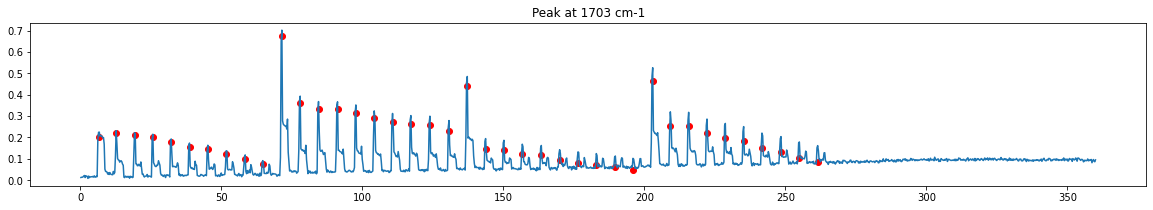

In [49]:
peak_of_interest = 'Peak at 1703 cm-1'
prominence = 0.0471
height = 0.162

## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

residence_time = 4.5
time_adjust_before = 1.3
time_adjust_after = 0.5

## EXP AREA: Determine the experimental areas of a single wavelength
#processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after)

## FITTED AREA - SINGLE PEAK: Fit a gaussian to a single peak and determine it's area
#processed_ir_data= peaks.fitted_area_sp(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after, 0)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest, time_adjust_before, time_adjust_after)

# Compare prominence, height, experimental area, and fitted area
#r2, compare = peaks.compare(prominence, height, residence_time, peak_of_interest, 4, 10, time_adjust_before, time_adjust_after)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

# Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

processed_ir_data
#r2

In [56]:
# Trim df (if requried)
#compare = compare.iloc[:-39,:]

# Because R1 t0 is nonsense
processed_ir_data.iloc[0,1] = 0.46
processed_ir_data

,Relative Time,Peak Property,Method
0,6.683333,0.460000,prominence
1,12.683333,0.222701,prominence
2,19.183333,0.209898,prominence
3,25.683333,0.201083,prominence
4,32.183333,0.177009,prominence
5,38.683333,0.154695,prominence
6,45.183333,0.145431,prominence
7,51.683333,0.120307,prominence
8,58.433333,0.099693,prominence
9,64.683333,0.072837,prominence


# Read experimental conditions and add to dataframe

In [57]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  40 , Number of conditions =  40


### Create the SPKA profiles

In [58]:
spka = SPKA(experimental_data)

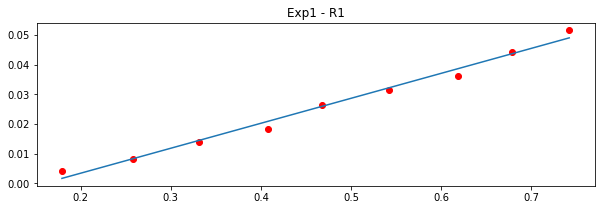

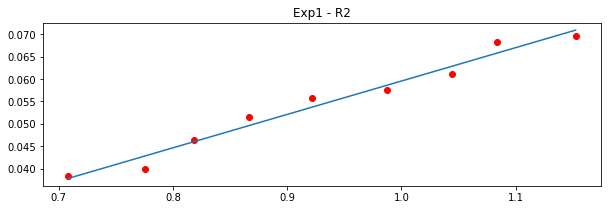

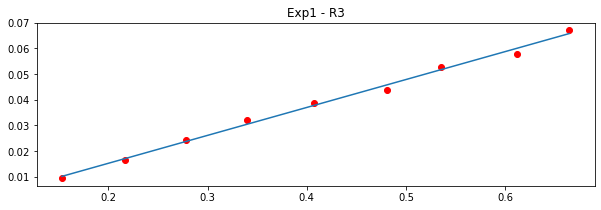

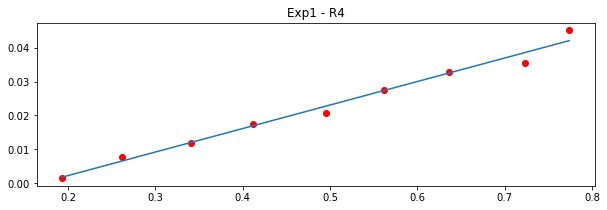

In [59]:
spka_data = spka.spka('[A]0')
spka_data
spka.plot(spka_data)

## To Compare
#r2 = spka.compare('[A]0')
#r2

### Perform RPKA

In [60]:
rpka = RPKA(spka_data)

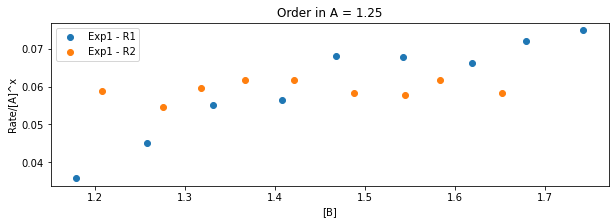

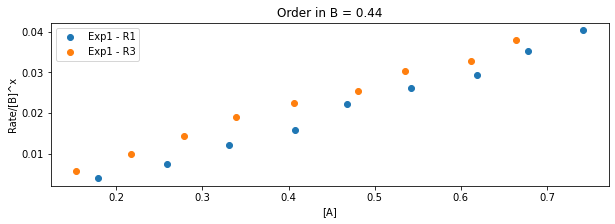

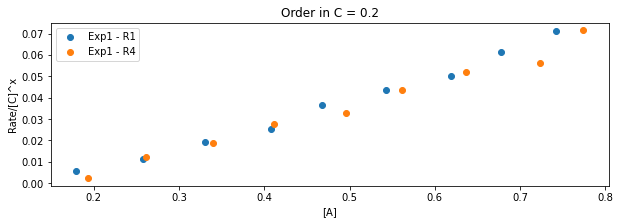

In [61]:
rpka_data = rpka.diff_excess()
#rpka_data

In [33]:
# Set up excelwriter
writer = pd.ExcelWriter('Processed - Prominence 1703.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open